# **Gradient Descent with Feature Scaling**


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia



## Synthetic Data Preparation

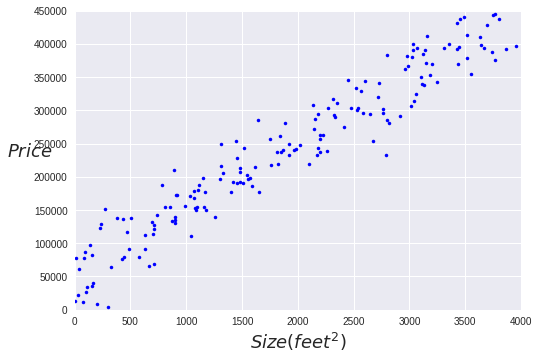

In [1]:
import numpy as np                   #this is our old friend, the handy NumPy
import matplotlib.pyplot as plt      # matplotlib takes cares of ploting   

from sklearn.model_selection import train_test_split   # we use this module to split the dataset to two parts, the training data, 
                                                       #which we use to train the learner, and the test data, which we use to evaluate 
                                                       # the performance of the trained model when it is given unseen data,
                                                       #to assess its generalization power. 

      
      
data_size=300      
# we create a synthetic data set      
x = 4000 * np.random.rand(data_size, 1)
y = 50000 + 100 * x +35000*np.random.randn(data_size, 1)



#we split the dataset to training and testing
test_fraction=0.4

x_train, x_test, y_train, y_test=train_test_split (x, y, test_size=test_fraction, random_state=6)


training_size=data_size*(1-test_fraction)
test_size=data_size*test_fraction

plt.plot(x_train, y_train, "b.")


plt.xlabel("$Size (feet^2)$", fontsize=18)
plt.ylabel("$Price$", rotation=0, fontsize=18)
plt.axis([0, 4000, 0, 450000])
plt.show()


## Gradient Descent

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


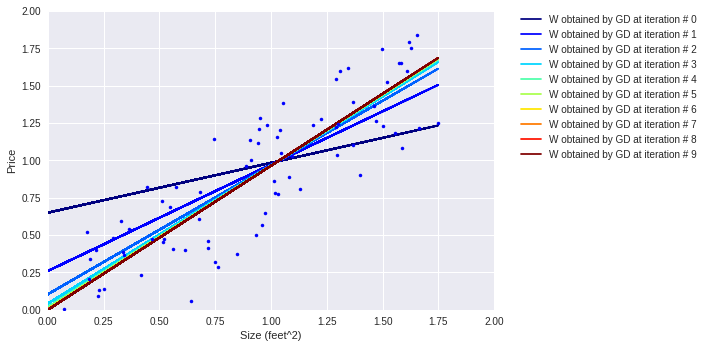

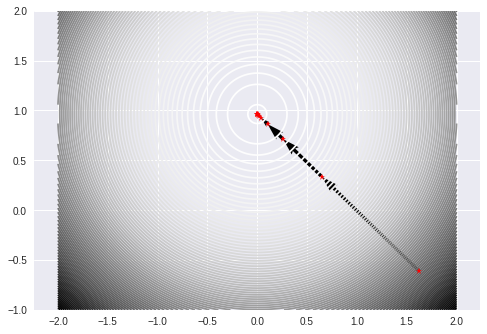

In [2]:
def ErrorForLinearReg(w0, w1, x_data,y_data):
    total_Error = 0
    for i in range(0, len(x_data)):
        total_Error += (y_data[i] - (w1 * x_data[i]+ w0)) ** 2
    return total_Error / float(len(x_data))
  
  
  
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()



scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled=scaler.transform(x_train)
scalery = preprocessing.StandardScaler().fit(y_train)
y_train_scaled=scalery.transform(y_train)

x_train_scaledp=np.c_[np.ones((int(training_size))),x_train_scaled]  #padding x_train with ones



xx=np.linspace(-2,2,1000)
yy=np.linspace(-1,2,1000)
X, Y = np.meshgrid(xx, yy)
Z = ErrorForLinearReg(X, Y,x_train_scaled, y_train_scaled)
ax2.contour(X, Y, Z,100)



alpha = 0.3
n_iterations = 10
m = training_size

colors = plt.cm.jet(np.linspace(0,1,n_iterations))

np.random.seed(seed=1)
W = np.random.randn(2,1)

Wtrajectory=np.array(W)


for iteration in range(n_iterations):
    gradients = 2/m * x_train_scaledp.T.dot(x_train_scaledp.dot(W) - y_train_scaled)
    W = W - alpha * gradients
    y_hat=x_train_scaledp.dot(W) 
    ax1.plot(x_train_scaled,y_hat,color=colors[iteration],label="W obtained by GD at iteration # %d"%iteration)
    Wtrajectory=np.hstack((Wtrajectory,W))


    
x_hat=np.linspace(-2,2,100)
x_p=np.c_[np.ones((100)),x_hat] # we are adding x_0=1 as the first feature




ax1.plot(x_train_scaled,y_train_scaled,"b.")


ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax1.axis([0, 2, 0, 2])
ax1.set_xlabel('Size (feet^2)')
ax1.set_ylabel('Price')
fig1.show()


ax2.plot(Wtrajectory[0,:],Wtrajectory[1,:],'r*')
ax2.quiver(Wtrajectory[0,:-1], Wtrajectory[1,:-1], Wtrajectory[0,1:]-Wtrajectory[0,:-1], Wtrajectory[1,1:]-Wtrajectory[1,:-1], scale_units='xy', angles='xy', scale=1)
ax2.axis('equal')
fig2.show()

## Inverting back the outputs
We scaled both the inputs and outputs. Therefore, the learner learns to predict the house valued in this new scaled world. However, we can always invert the predicted outputs back to the original scale so that the numbers start to make sense. 

As an example, here we invert back the scaled y_train using the original scalery that had transformed the y_train. And we compare the results with the original y_train. We see that they both are the same. 

In practice, whenever you want to apply a new feature set to the learner, you transform the inputs using the SAME transformation that you had used during the training to transform x_train. You get the output, and invert the output using the inverse of the same transformation that you had used during the training for y_training.




In [3]:
y_new_inverse = scalery.inverse_transform(y_train_scaled)
print(y_train)
print(y_new_inverse)   # we observe that they both are the same!

[[191127.93227998]
 [429259.20874544]
 [263157.12343086]
 [437679.76038845]
 [178734.90112016]
 [  8158.8252042 ]
 [440018.49263591]
 [287249.37216844]
 [317736.99483059]
 [338877.63198965]
 [380375.1594667 ]
 [187260.55770468]
 [394063.19263562]
 [129685.71125272]
 [196535.14373216]
 [412500.15541926]
 [300797.16800291]
 [176986.57883872]
 [324300.61329111]
 [247256.79922301]
 [253396.5643725 ]
 [137693.71937753]
 [444589.00914505]
 [460875.32994051]
 [116602.86851177]
 [394397.38985168]
 [242846.2090086 ]
 [290534.32212561]
 [232267.16280316]
 [155208.77811123]
 [114156.91088217]
 [ 26488.02786647]
 [370236.92036163]
 [493404.55695934]
 [135348.31887172]
 [319589.36251825]
 [232887.56080758]
 [249365.97870758]
 [212927.98024761]
 [271244.53962425]
 [392690.3879039 ]
 [120949.40590207]
 [328926.86025474]
 [295401.49508682]
 [396177.73622746]
 [371968.67225223]
 [392435.04796644]
 [280370.09500028]
 [237231.57393989]
 [ 78353.84850385]
 [137204.51309974]
 [391517.90769333]
 [177254.486